## LDA Example - using LDA github 

The example at the lda github repository looks at corpus of Reuters news releases– let’s replicate this and add some details to better understand what is going on. A script containing all of the code to follow, called ex002_lda.py, is available at this gist. To get started, we do some imports:

In [1]:

from __future__ import division, print_function

import numpy as np
import lda
import lda.datasets

Next, we import the data used for the example. This is included with the lda package, so this step is simple (I also print out the data type and size for each item):

In [2]:
# document-term matrix
X = lda.datasets.load_reuters()
print("type(X): {}".format(type(X)))
print("shape: {}\n".format(X.shape))

# the vocab
vocab = lda.datasets.load_reuters_vocab()
print("type(vocab): {}".format(type(vocab)))
print("len(vocab): {}\n".format(len(vocab)))

# titles for each story
titles = lda.datasets.load_reuters_titles()
print("type(titles): {}".format(type(titles)))
print("len(titles): {}\n".format(len(titles)))

type(X): <class 'numpy.ndarray'>
shape: (395, 4258)

type(vocab): <class 'tuple'>
len(vocab): 4258

type(titles): <class 'tuple'>
len(titles): 395



From the above we can see that there are 395 news items (documents) and a vocabulary of size 4258. The document-term matrix, X, has a count of the number of occurences of each of the 4258 vocabulary words for each of the 395 documents. For example, X[0,3117] is the number of times that word 3117 occurs in document 0. We can find out the count and the word that this corresponds to using (let’s also get the document title):

In [3]:
#Of course we should expect that there are lots of zeros in the X matrix 
#I chose this example to get a non-zero result.
doc_id = 0
word_id = 3117

print("doc id: {} word id: {}".format(doc_id, word_id))
print("-- count: {}".format(X[doc_id, word_id]))
print("-- word : {}".format(vocab[word_id]))
print("-- doc  : {}".format(titles[doc_id]))

doc id: 0 word id: 3117
-- count: 2
-- word : heir-to-the-throne
-- doc  : 0 UK: Prince Charles spearheads British royal revolution. LONDON 1996-08-20


Next we initialize and fit the LDA model. To do this we have to choose the number of topics (other methods can attempt to find the number of topics as well, but for LDA we have to assume a number). Continuing with the example we choose:

In [4]:
model = lda.LDA(n_topics=20, n_iter=500, random_state=1)
model.fit(X)

INFO:lda:n_documents: 395
INFO:lda:vocab_size: 4258
INFO:lda:n_words: 84010
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -1051748
INFO:lda:<10> log likelihood: -719800
INFO:lda:<20> log likelihood: -699115
INFO:lda:<30> log likelihood: -689370
INFO:lda:<40> log likelihood: -684918
INFO:lda:<50> log likelihood: -681322
INFO:lda:<60> log likelihood: -678979
INFO:lda:<70> log likelihood: -676598
INFO:lda:<80> log likelihood: -675383
INFO:lda:<90> log likelihood: -673316
INFO:lda:<100> log likelihood: -672761
INFO:lda:<110> log likelihood: -671320
INFO:lda:<120> log likelihood: -669744
INFO:lda:<130> log likelihood: -669292
INFO:lda:<140> log likelihood: -667940
INFO:lda:<150> log likelihood: -668038
INFO:lda:<160> log likelihood: -667429
INFO:lda:<170> log likelihood: -666475
INFO:lda:<180> log likelihood: -665562
INFO:lda:<190> log likelihood: -664920
INFO:lda:<200> log likelihood: -664979
INFO:lda:<210> log likelihood: -664722
INFO:lda:<220> log likelihood: -6

## Topic-Word
From the fit model we can look at the topic-word probabilities:

In [5]:
topic_word = model.topic_word_
print("type(topic_word): {}".format(type(topic_word)))
print("shape: {}".format(topic_word.shape))

type(topic_word): <class 'numpy.ndarray'>
shape: (20, 4258)


From the size of the output we can see that we have a distribution over the 4258 words in the vocabulary for each of the 20 topics. For each topic, the probabilities of the words should be normalized. Let’s check the first 5:

In [6]:
for n in range(5):
    sum_pr = sum(topic_word[n,:])
    print("topic: {} sum: {}".format(n, sum_pr))

topic: 0 sum: 1.0000000000000875
topic: 1 sum: 1.0000000000001148
topic: 2 sum: 0.9999999999998656
topic: 3 sum: 1.0000000000000042
topic: 4 sum: 1.0000000000000928


In [7]:
# We can also get the top 5 words for each topic (by probability):
n = 5
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n+1):-1]
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))
    
# This gives us some sense of what the 20 topics might actually mean

# can you see the patterns?

*Topic 0
- government british minister west group
*Topic 1
- church first during people political
*Topic 2
- elvis king wright fans presley
*Topic 3
- yeltsin russian russia president kremlin
*Topic 4
- pope vatican paul surgery pontiff
*Topic 5
- family police miami versace cunanan
*Topic 6
- south simpson born york white
*Topic 7
- order church mother successor since
*Topic 8
- charles prince diana royal queen
*Topic 9
- film france french against actor
*Topic 10
- germany german war nazi christian
*Topic 11
- east prize peace timor quebec
*Topic 12
- n't told life people church
*Topic 13
- years world time year last
*Topic 14
- mother teresa heart charity calcutta
*Topic 15
- city salonika exhibition buddhist byzantine
*Topic 16
- music first people tour including
*Topic 17
- church catholic bernardin cardinal bishop
*Topic 18
- harriman clinton u.s churchill paris
*Topic 19
- century art million museum city


## Document-Topic
The other information we get from the model is document-topic probabilities:

In [8]:
doc_topic = model.doc_topic_
print("type(doc_topic): {}".format(type(doc_topic)))
print("shape: {}".format(doc_topic.shape))

type(doc_topic): <class 'numpy.ndarray'>
shape: (395, 20)


Looking at the size of the output we can see that there is a distribution over the 20 topics for each of the 395 documents. These should be normalized for each document, let’s test the first 5:

In [9]:
for n in range(5):
    sum_pr = sum(doc_topic[n,:])
    print("document: {} sum: {}".format(n, sum_pr))

document: 0 sum: 1.0000000000000002
document: 1 sum: 0.9999999999999998
document: 2 sum: 1.0
document: 3 sum: 1.0000000000000002
document: 4 sum: 0.9999999999999997


In [10]:
# Using the title of the new stories, we can sample the most probable topic:

for n in range(10):
    topic_most_pr = doc_topic[n].argmax()
    print("doc: {} topic: {}\n{}...".format(n,
                                            topic_most_pr,
                                            titles[n][:50]))

doc: 0 topic: 8
0 UK: Prince Charles spearheads British royal revo...
doc: 1 topic: 1
1 GERMANY: Historic Dresden church rising from WW2...
doc: 2 topic: 14
2 INDIA: Mother Teresa's condition said still unst...
doc: 3 topic: 8
3 UK: Palace warns British weekly over Charles pic...
doc: 4 topic: 14
4 INDIA: Mother Teresa, slightly stronger, blesses...
doc: 5 topic: 14
5 INDIA: Mother Teresa's condition unchanged, thou...
doc: 6 topic: 14
6 INDIA: Mother Teresa shows signs of strength, bl...
doc: 7 topic: 14
7 INDIA: Mother Teresa's condition improves, many ...
doc: 8 topic: 14
8 INDIA: Mother Teresa improves, nuns pray for "mi...
doc: 9 topic: 8
9 UK: Charles under fire over prospect of Queen Ca...


In [16]:
# Looks pretty good except for topic 0– should docs 1 and 9 be given the same topic? 
# Doesn’t look like it.

## Visualizing the inference
Finally, let’s visualize some of the distributions. To do that I’m going to use matplotlib – you can see my previous posts (above) if you need help installing.

First, we import matplotlib and set a style:

In [17]:
import matplotlib.pyplot as plt

# use matplotlib style sheet
try:
    plt.style.use('ggplot')
except:
    # version of matplotlib might not be recent
    pass

Next, let’s see what some of the topic-word distributions look like. The idea here is that each topic should have a distinct distribution of words. In the stem plots below, the height of each stem reflects the probability of the word in the focus topic:

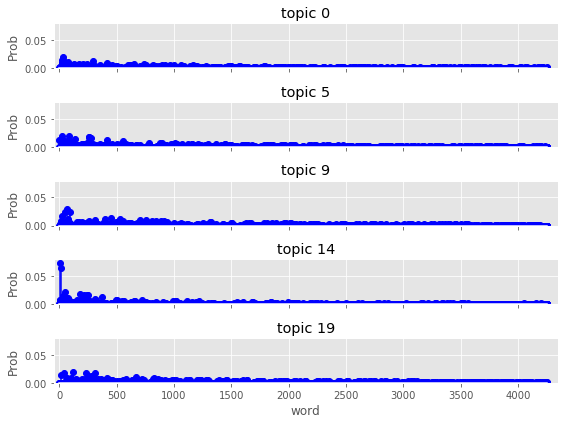

In [18]:
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([0, 5, 9, 14, 19]):
    ax[i].stem(topic_word[k,:], linefmt='b-',
               markerfmt='bo', basefmt='w-')
    ax[i].set_xlim(-50,4350)
    ax[i].set_ylim(0, 0.08)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("topic {}".format(k))

ax[4].set_xlabel("word")

plt.tight_layout()
plt.show()

Finally, let’s look at the topic distribution for a few documents. These distributions give the probability of each of the 20 topics for every document. I will only plot a few:

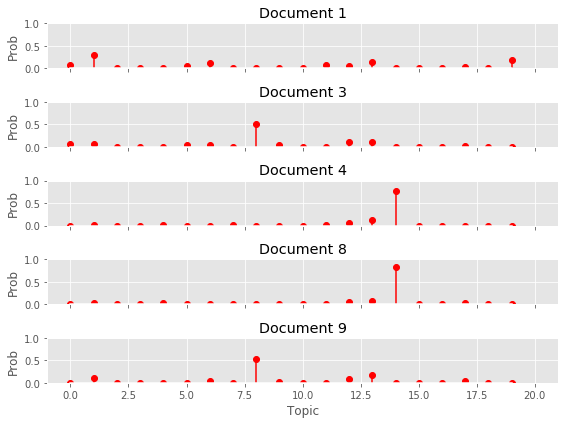

In [19]:
f, ax= plt.subplots(5, 1, figsize=(8, 6), sharex=True)
for i, k in enumerate([1, 3, 4, 8, 9]):
    ax[i].stem(doc_topic[k,:], linefmt='r-',
               markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(-1, 21)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Prob")
    ax[i].set_title("Document {}".format(k))

ax[4].set_xlabel("Topic")

plt.tight_layout()
plt.show()

Plotting the distribution of topics for the above documents provides an important insight: many documents have more than one topic with high probability. As a result, choosing the topic with highest probability for each document can be subject to uncertainty; note to self: be careful. Maybe the full distribution over topics should be considered when comparing two documents?